## Практическое задание к уроку № 1 по теме  
## "Алгоритм линейной регрессии. Градиентный спуск."

#### Задание 1.  

*Дан код:*

In [1]:
import numpy as np

In [2]:
def calc_mse(y, y_pred):
    return np.mean((y - y_pred)**2)

In [3]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]]).T
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]
w_lstsq = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

In [4]:
# n = X.shape[0]
# eta = 1e-3
# iterations = 1001
# w = np.array([1, 0.5])

# for i in range(iterations):
#     y_pred = np.dot(w, X.T)
#     err = calc_mse(y, y_pred)
#     for j in range(w.shape[0]):
#         w[j] -= eta * (1/n * 2 * np.sum(X[:,j] * (y_pred - y)))
#     if i % 100 == 0:
#         print(i, w, err) # МНК: array([47.23214286,  3.91071429]) 45.937499999999986

*Проведите небольшое исследование алгоритма градиентного спуска на данных из урока.  
Оцените влияние значений скорости обучения (`eta`) и количества итераций на ошибку алгоритма.  
Как связаны эти два гиперпараметра между собой? Подберите скорость обучения и количество итераций  
до совпадения ответов алгоритма с результатами МНК. Как можно ускорить процесс вычисления весов?*  

In [5]:
from itertools import product

Модифицируем алгоритм:

In [6]:
n = X.shape[0]
eta = (0.001, 0.003, 0.005)
iterations = (100, 500, 1000, 2000, 4000)
errors = {i: [] for i in eta}

for koef, count in product(eta, iterations):
    w = np.array([1, 0.5])

    for i in range(count):
        w = w - koef * 2/n * (np.dot(X.T, (np.dot(X, w) - y)))
    
    y_pred = np.dot(X, w)
    err = calc_mse(y, y_pred)
    if not errors[koef]:
        errors[koef] = [err]
    else:
        errors[koef].append(err)
    print(f'eta: {koef}, iterations: {count}\nweights: {w}, mse: {err}\n')
    if np.allclose(w, w_lstsq, atol=1e-03):
        print('Веса совпадают с результатом МНК!\n')

eta: 0.001, iterations: 100
weights: [ 7.39082363 10.70887732], mse: 899.5990444359252

eta: 0.001, iterations: 500
weights: [21.01880845  8.75120433], mse: 415.355423398327

eta: 0.001, iterations: 1000
weights: [31.6502796   6.78802453], mse: 176.46806566379882

eta: 0.001, iterations: 2000
weights: [41.72642888  4.92738649], mse: 62.2342399245102

eta: 0.001, iterations: 4000
weights: [46.54475452  4.0376458 ], mse: 46.19152576288303

eta: 0.003, iterations: 100
weights: [14.96620143  9.86795836], mse: 605.6406683102937

eta: 0.003, iterations: 500
weights: [37.9849427   5.61828053], mse: 91.90955934014146

eta: 0.003, iterations: 1000
weights: [45.29306439  4.26877996], mse: 47.958955623914335

eta: 0.003, iterations: 2000
weights: [47.14687887  3.92645893], mse: 45.94140845142199

eta: 0.003, iterations: 4000
weights: [47.231978    3.91074473], mse: 45.93750001461119

Веса совпадают с результатом МНК!

eta: 0.005, iterations: 100
weights: [21.04725202  8.74595374], mse: 414.554170

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
plt.style.use('seaborn-whitegrid')

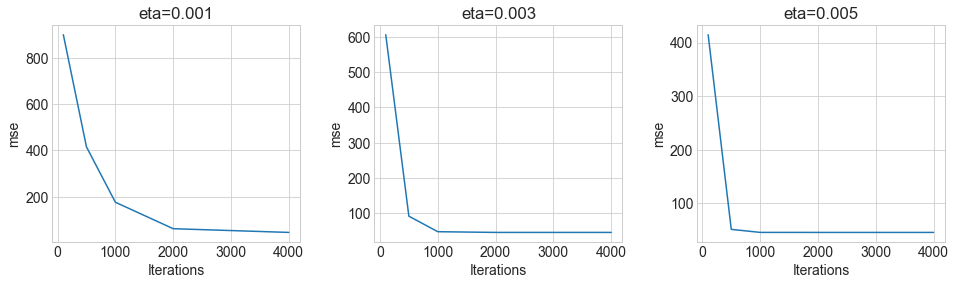

In [8]:
fig, ax = plt.subplots(1, 3)
ax1, ax2, ax3 = ax.flatten()
fig.set_size_inches(16, 4)
plt.subplots_adjust(wspace=0.3)

ax1.plot(iterations, errors[eta[0]])
ax2.plot(iterations, errors[eta[1]])
ax3.plot(iterations, errors[eta[2]])

ax1.set_title(f'eta={eta[0]}')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('mse')

ax2.set_title(f'eta={eta[1]}')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('mse')

ax3.set_title(f'eta={eta[2]}')
ax3.set_xlabel('Iterations')
ax3.set_ylabel('mse')

plt.show()

<u>Вывод:</u> Проведено исследование алгоритма на данных из урока. Результаты показывают, что при увеличении коэффициента `eta` количество требуемых итераций снижается. В первом случае нам не хватило и 2000 итераций: на графике виден дальнейший уклон вниз при увеличении количества итераций до 4000. Увеличение коэффициента `eta` до 0,003 и 0,005 в нашем случае позволяет сократить число требуемых итераций до 1000 для получения близких к искомым весовых коэффициентов.  
При значениях eta и числа итераций соответственно 0,003 и 4000, а также 0,005 и 2000, весовые коэффициенты совпали с весами, полученными методом наименьших квадратов (сравнение проводилось с помощью функции `numpy.allclose()` с абсолютной погрешностью 1е-03).

Однако, мы не можем без конца увеличивать шаг с целью снижения требуемого числа итераций, так как при больших значениях шага мы будем "перескакивать" через минимум функции, и веса начнут бесконтрольно расти. Проверим это, посчитаем весовые коэффициенты с шагом 0,07:

In [9]:
eta = 0.07
iterations = 1000
w = np.array([1, 0.5])

for i in range(iterations + 1):
    y_pred = np.dot(X, w)
    err = calc_mse(y, y_pred)

    w = w - eta * 2/n * (np.dot(X.T, (np.dot(X, w) - y)))
    
    if i % 100 == 0:
        print(f'eta: {eta}, iterations: {i}\nweights: {w}, mse: {err}\n')

eta: 0.07, iterations: 0
weights: [ 8.714 24.3  ], mse: 3173.15

eta: 0.07, iterations: 100
weights: [ 90145.66877384 487925.52597244], mse: 3006560937495.454

eta: 0.07, iterations: 200
weights: [3.42406430e+09 1.85427696e+10], mse: 4.342292800653201e+21

eta: 0.07, iterations: 300
weights: [1.30126711e+14 7.04691687e+14], mse: 6.271453384410683e+30

eta: 0.07, iterations: 400
weights: [4.94528129e+18 2.67808092e+19], mse: 9.057686655059265e+39

eta: 0.07, iterations: 500
weights: [1.87938409e+23 1.01776671e+24], mse: 1.3081766300802775e+49

eta: 0.07, iterations: 600
weights: [7.14233298e+27 3.86787820e+28], mse: 1.8893633227335135e+58

eta: 0.07, iterations: 700
weights: [2.71434246e+32 1.46993231e+33], mse: 2.7287551873415993e+67

eta: 0.07, iterations: 800
weights: [1.0315474e+37 5.5862695e+37], mse: 3.9410656398636985e+76

eta: 0.07, iterations: 900
weights: [3.92024973e+41 2.12298258e+42], mse: 5.691972094002953e+85

eta: 0.07, iterations: 1000
weights: [1.48983537e+46 8.0680945

Действительно, с увеличением числа итераций, ошибка стала расти.

Ускорить процесс вычисления весов можно при помощи "плавающего" значения шага. Реализуем это:

In [10]:
iterations = 1000
w = np.array([1, 0.5])

for i in range(1, iterations + 1):
    eta = 2 / i # "Плавающий" коэффициент, зависящий от числа пройденных итераций
    y_pred = np.dot(X, w)
    err = calc_mse(y, y_pred)

    w = w - eta * 2/n * (np.dot(X.T, (np.dot(X, w) - y)))
    
    if i % 100 == 0:
        print(f'eta: {eta}, iterations: {i}\nweights: {w}, mse: {err}\n')

eta: 0.02, iterations: 100
weights: [44.09075307  4.49079594], mse: 51.47062381138287

eta: 0.01, iterations: 200
weights: [46.49312513  4.04717956], mse: 46.237320862342074

eta: 0.006666666666666667, iterations: 300
weights: [46.91471403  3.96932995], mse: 45.99242980682645

eta: 0.005, iterations: 400
weights: [47.05779316  3.94290929], mse: 45.954013660086346

eta: 0.004, iterations: 500
weights: [47.12258421  3.93094513], mse: 45.94400709037531

eta: 0.0033333333333333335, iterations: 600
weights: [47.15718423  3.92455597], mse: 45.940541812486586

eta: 0.002857142857142857, iterations: 700
weights: [47.17775706  3.92075704], mse: 45.9390996636288

eta: 0.0025, iterations: 800
weights: [47.19095203  3.91832049], mse: 45.938416928240585

eta: 0.0022222222222222222, iterations: 900
weights: [47.19990561  3.91666714], mse: 45.93806130479158

eta: 0.002, iterations: 1000
weights: [47.20625189  3.91549525], mse: 45.93786189136599



За 1000 итераций значения весов оказались ближе к эталонному значению, чем расчёт с предварительно заданным шагом 0,005 (максимум в нашем исследовании выше).

#### Задание 2*.
*Дан код:*

In [11]:
eta = 0.001
iterations = 1001
w = np.array([1, 0.5])

for i in range(iterations):
    y_pred = np.dot(w, X.T)
    err = calc_mse(y, y_pred)
    w -= (eta * (1/n * 2 * np.sum(X.T * (y_pred - y)))) # ошибка!
    if i % 100 == 0:
        print(i, w, err) # [47.23214286  3.91071429] 45.937499999999986

0 [1.4502 0.9502] 3173.15
100 [11.6740207 11.1740207] 737.5884748924025
200 [11.82000082 11.32000082] 737.0919281764903
300 [11.82208519 11.32208519] 737.0918269437198
400 [11.82211495 11.32211495] 737.0918269230813
500 [11.82211538 11.32211538] 737.0918269230768
600 [11.82211538 11.32211538] 737.0918269230768
700 [11.82211538 11.32211538] 737.091826923077
800 [11.82211538 11.32211538] 737.0918269230768
900 [11.82211538 11.32211538] 737.0918269230768
1000 [11.82211538 11.32211538] 737.0918269230768


*В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее.*

Ошибка здесь в том, что мы перемножаем поэлементно столбцы Х на (у_pred - y), а нужно брать скалярное произведение. У нас должно получиться 2 числа, а мы еще и находим сумму чисел. В итоге, нужно заменить произведение матриц на скалярное и не высчитывать сумму получившейся пары значений.

In [12]:
eta = 0.001
iterations = 1001
w = np.array([1, 0.5])

for i in range(iterations):
    y_pred = np.dot(w, X.T)
    err = calc_mse(y, y_pred)
    w -= eta * (1/n * 2 * (X.T @ (y_pred - y)))
    if i % 100 == 0:
        print(i, w, err) # [47.23214286  3.91071429] 45.937499999999986

0 [1.1102 0.84  ] 3173.15
100 [ 7.43515582 10.71754582] 899.5990444359252
200 [11.44993589 10.49282195] 735.5540619653668
300 [14.98921624  9.8634316 ] 606.0048772266812
400 [18.17511588  9.27626113] 500.7989288428639
500 [21.04606457  8.74617136] 415.355423398327
600 [23.63334499  8.26841272] 345.9620646005472
700 [25.96499229  7.83785632] 289.6039104863001
800 [28.06626432  7.44984037] 243.83236130353217
900 [29.95992301  7.10016181] 206.65877484533297
1000 [31.66648131  6.78503276] 176.46806566379882


#### Задание 3.
*Вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию начинает изменяться ниже определенного порога.*  
*Сколько нужно сделать итераций, если установить допустимое отклонение mse в размере diff=10^-6, а значение eta=10^-2?*

In [13]:
w = np.array([1, 0.5])
diff = 1e-6
eta = 1e-2
err = np.inf
iterations = 0
new_err = 0

while abs(err - new_err) > diff:
    err = new_err
    y_pred = np.dot(X, w)
    new_err = calc_mse(y, y_pred)

    w = w - eta * 2/n * (np.dot(X.T, (np.dot(X, w) - y)))
    
    # if iterations % 100 == 0:
    #     print(f'eta: {eta}, iterations: {iterations}\nweights: {w}, mse: {new_err}\n')
    iterations += 1
else:
    print(f'Требуемое число итераций: {iterations}.')

Требуемое число итераций: 810.
